In [488]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [489]:
df = pd.read_csv('./data/gurgaon_properties_cleaned_v2.csv').drop_duplicates()
df.head(2)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,...,1081.0,NaN,650.0,0,0,0,0,0,0,8
1,flat,smart world gems,sector 89,0.95,8600.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,...,NaN,NaN,1103.0,1,1,0,0,0,0,38


In [490]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3677 entries, 0 to 3802
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        3677 non-null   object 
 1   society              3676 non-null   object 
 2   sector               3677 non-null   object 
 3   price                3660 non-null   float64
 4   price_per_sqft       3660 non-null   float64
 5   area                 3660 non-null   float64
 6   areaWithType         3677 non-null   object 
 7   bedRoom              3677 non-null   int64  
 8   bathroom             3677 non-null   int64  
 9   balcony              3677 non-null   object 
 10  floorNum             3658 non-null   float64
 11  facing               2632 non-null   object 
 12  agePossession        3677 non-null   object 
 13  super_built_up_area  1875 non-null   float64
 14  built_up_area        1690 non-null   float64
 15  carpet_area          1872 non-null   f

# 'price' Analysis for outliers 

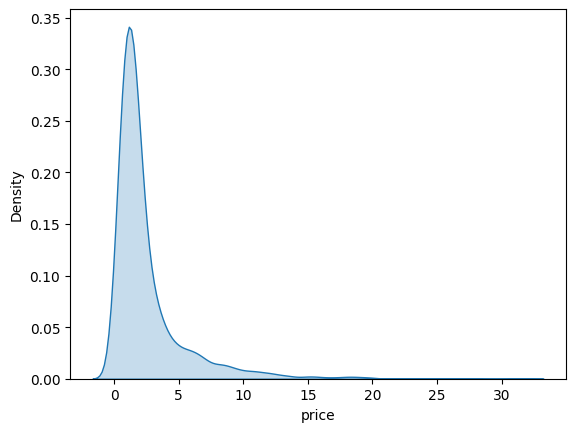

In [491]:
# check distribution. Its not normal distribution
sns.kdeplot(df['price'], fill=True)
# sns.displot(np.log1p(df['price']), kde=True)
plt.show()

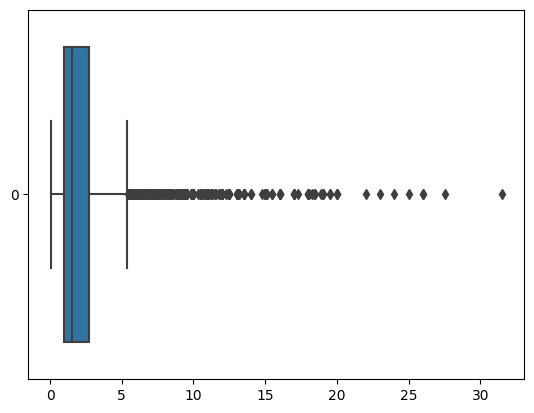

In [492]:
sns.boxplot(df['price'], orient='h')
plt.show()

In [493]:
# Assuming df is your DataFrame and 'price' is the column of interest

def analyse_outliers(column_name):
    # Calculate the interquartile range (IQR)
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the DataFrame to get the outliers
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

    # Display the numerical values of outliers
    print("Outliers:")
    print(outliers[column_name].describe())
    return outliers

outliers = analyse_outliers('price')


Outliers:
count    425.000000
mean       9.235624
std        4.065259
min        5.460000
25%        6.460000
50%        8.000000
75%       10.750000
max       31.500000
Name: price, dtype: float64


In [494]:
outliers.sort_values('price', ascending=False).head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
821,house,arjun marg/ sector- 26 phase- 1/ golf course road,sector 26,31.5,35000.0,9000.0,Plot area 1000(836.13 sq.m.),7,9,3+,...,NaN,9000.0,NaN,1,1,1,1,0,2,74
2834,house,independent,sector 43,27.5,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,3+,...,NaN,11286.0,NaN,1,1,0,1,1,1,42
2488,house,dlf city plots,sector 26,26.0,57206.0,4545.0,Plot area 505(422.24 sq.m.),6,7,3+,...,NaN,4545.0,NaN,1,1,0,1,1,1,138
2211,house,independent,sector 26,26.0,82540.0,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16,16,3+,...,NaN,400.0,350.0,1,1,1,1,0,2,72
1686,house,suncity township,sector 54,25.0,31111.0,8036.0,Plot area 1000(836.13 sq.m.),4,4,3+,...,NaN,1000.0,NaN,1,1,1,1,0,0,0


In [495]:
# save in excel for better reading
outliers.sort_values('price', ascending=False).to_csv('./data/price_outliers.csv')
# on the basis of price col we can say that there are some genuine outliers but there are some data erros as well

# 'price_per_sqft' Analysis for outliers 

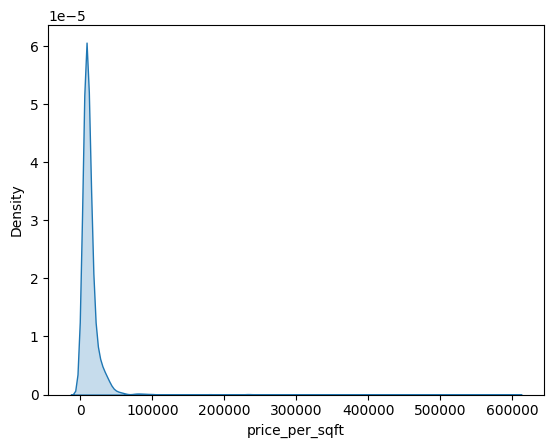

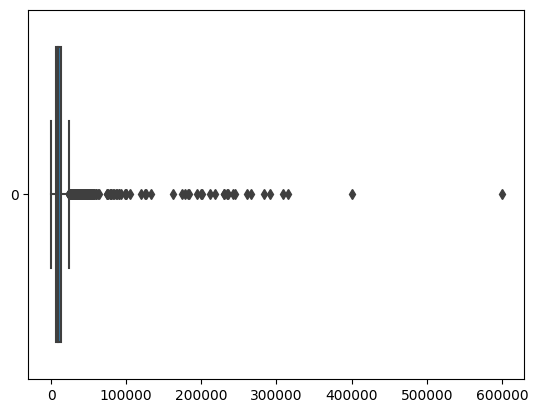

Outliers:
count       354.000000
mean      52592.612994
std       61150.458507
min       24489.000000
25%       28208.250000
50%       33368.500000
75%       41982.250000
max      600000.000000
Name: price_per_sqft, dtype: float64


In [496]:
# check distribution. Its not normal distribution
sns.kdeplot(df['price_per_sqft'], fill=True)
plt.show()

sns.boxplot(df['price_per_sqft'], orient='h')
plt.show()

outliers_sqft = analyse_outliers('price_per_sqft')

In [497]:
#outliers_sqft.loc[:, 'area'] = outliers_sqft['area'].apply(lambda x : x*9 if x<1000 else x)
outliers_sqft.loc[outliers_sqft['area'] < 1000, 'area'] *= 9

In [498]:
outliers_sqft.loc[:, 'price_per_sqft'] = round((outliers_sqft['price'] * 10000000) / outliers_sqft['area'])

/var/folders/yq/5yv62gb931983s7ntw7b4gh00000gn/T/ipykernel_10220/1098268879.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft.loc[:, 'price_per_sqft'] = round((outliers_sqft['price'] * 10000000) / outliers_sqft['area'])


In [499]:
outliers_sqft['price_per_sqft'].describe()

count      354.000000
mean     29357.906780
std      12403.077309
min       2723.000000
25%      25562.000000
50%      29870.500000
75%      35549.500000
max      82540.000000
Name: price_per_sqft, dtype: float64

In [500]:
# update only outliers values after correction
df.update(outliers_sqft)

/var/folders/yq/5yv62gb931983s7ntw7b4gh00000gn/T/ipykernel_10220/1471826828.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.update(outliers_sqft)


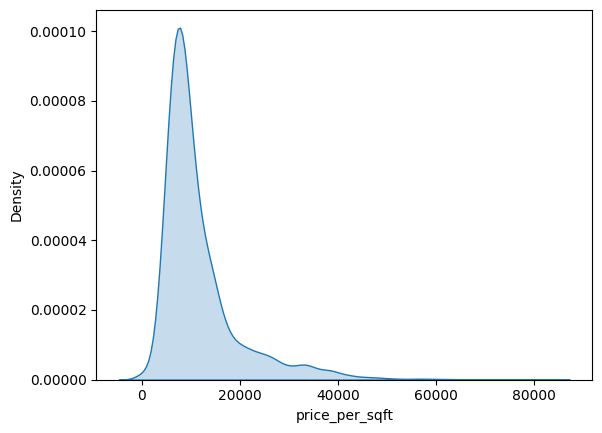

In [501]:
sns.kdeplot(df['price_per_sqft'], fill=True)
plt.show()

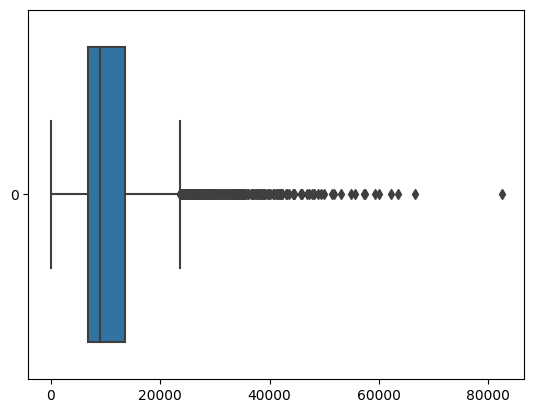

In [502]:
sns.boxplot(df['price_per_sqft'], orient='h')
plt.show()

In [503]:
# see extreme outliers
print(df[df['price_per_sqft']>50000].shape)
df[df['price_per_sqft']>50000]
# total 13 records found. they can be removed altogetherr

(13, 23)


,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
386,house,cloudnine cottages,sohna road road,5.50,55000.0,1000.0,Plot area 1000(92.9 sq.m.),3.0,3.0,0,...,NaN,1000.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
671,house,emaar mgf marbella,sector 66,18.00,55556.0,3240.0,Plot area 360(301.01 sq.m.),4.0,4.0,3+,...,NaN,3240.0,NaN,1.0,1.0,0.0,1.0,0.0,2.0,75.0
1200,house,independent,sector 26,14.75,51864.0,2844.0,Plot area 316(264.22 sq.m.),16.0,20.0,3+,...,NaN,2844.0,NaN,1.0,1.0,1.0,1.0,0.0,1.0,153.0
1261,house,independent,sector 25,16.00,59259.0,2700.0,Plot area 350(292.64 sq.m.)Built Up area: 325 ...,16.0,16.0,3+,...,NaN,325.0,300.0,1.0,1.0,1.0,1.0,0.0,2.0,72.0
1349,flat,unitech vistas,sector 70,9.00,57508.0,1565.0,Built Up area: 1565 (145.39 sq.m.),3.0,3.0,0,...,NaN,1565.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1425,house,project housing board colony,sector 31,8.00,63492.0,1260.0,Built Up area: 140 (117.06 sq.m.),2.0,1.0,0,...,NaN,140.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1640,house,emaar the palm springs,sector 54,14.00,62222.0,2250.0,Plot area 250(209.03 sq.m.),4.0,5.0,3+,...,NaN,2250.0,NaN,1.0,1.0,0.0,0.0,0.0,1.0,160.0
1839,house,unitech escape,sector 50,10.80,60000.0,1800.0,Plot area 290(242.48 sq.m.)Built Up area: 250 ...,4.0,4.0,3,...,NaN,250.0,200.0,1.0,1.0,1.0,1.0,0.0,1.0,103.0
2211,house,independent,sector 26,26.00,82540.0,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16.0,16.0,3+,...,NaN,400.0,350.0,1.0,1.0,1.0,1.0,0.0,2.0,72.0
2290,house,malibu towne,sector 47,8.50,53125.0,1600.0,Built Up area: 1600 (148.64 sq.m.),12.0,12.0,3+,...,NaN,1600.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,99.0


In [504]:
# remove the 13 value having higher price_per_sqft than 50K
df = df[df['price_per_sqft']<=50000]

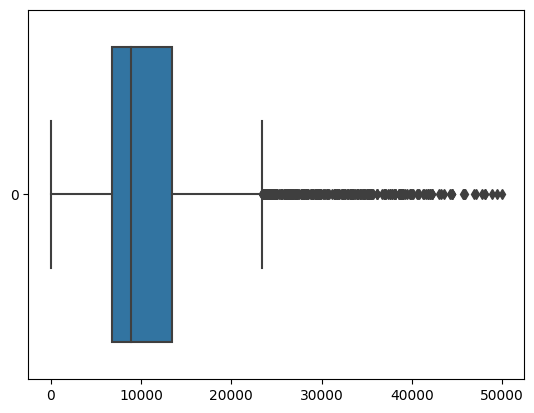

In [505]:
sns.boxplot(df['price_per_sqft'], orient='h')
plt.show()

# We will live with remianing high values. They seems to be the the legitimate data

# area column analysis

In [506]:
df['area'].describe()

count      3647.000000
mean       2947.723608
std       23208.194102
min         145.000000
25%        1262.000000
50%        1750.000000
75%        2350.000000
max      875000.000000
Name: area, dtype: float64

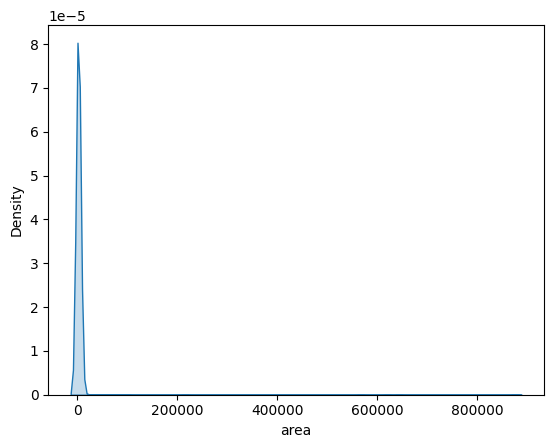

In [507]:
sns.kdeplot(df['area'], fill=True)
plt.show()

In [508]:
df[df['area'] < 100]['area'].shape

(0,)

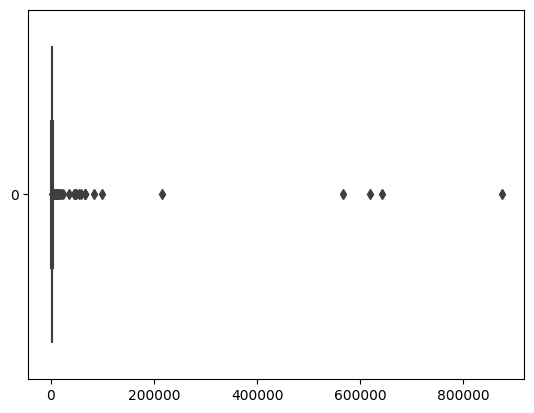

In [509]:
sns.boxplot(df['area'],orient='h')
plt.show()

In [510]:
print(df[df['area']>10000].shape)
df[df['area']>10000].sort_values('area', ascending=False)
# lmanually analyse these 25 values and remove what does not make sense at all

(25, 23)


,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1648,flat,hcbs sports ville,sohna road,0.35,4.0,875000.0,Built Up area: 737147 (68483.2 sq.m.),2.0,2.0,2,...,NaN,737147.0,NaN,0.0,0.0,0.0,0.0,0.0,2.0,44.0
2111,flat,signature the roselia,sector 95,0.45,7.0,642857.0,Carpet area: 569243 (52884.41 sq.m.),2.0,2.0,2,...,NaN,NaN,569243.00,0.0,0.0,0.0,0.0,0.0,0.0,76.0
2651,flat,ramsons kshitij,sector 95,0.31,5.0,620000.0,Carpet area: 607936 (56479.1 sq.m.),2.0,2.0,1,...,NaN,NaN,607936.00,1.0,0.0,0.0,0.0,1.0,0.0,65.0
1638,flat,signature global solera 2,sector 107,0.51,9.0,566667.0,Carpet area: 514396 (47788.95 sq.m.),2.0,2.0,1,...,NaN,NaN,514396.00,0.0,0.0,0.0,0.0,0.0,0.0,44.0
3021,house,independent,sector 50,5.00,232.0,215517.0,Plot area 2(1011.71 sq.m.),6.0,5.0,3+,...,NaN,2.0,NaN,1.0,1.0,0.0,1.0,1.0,1.0,0.0
818,house,independent,sector 26,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6.0,8.0,3+,...,NaN,NaN,11000.00,0.0,1.0,1.0,1.0,0.0,1.0,60.0
48,house,ganpati heights apartment,sector 13,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10.0,6.0,2,...,NaN,115.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,7.0
1123,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64412 (5984.07 sq.m.),3.0,2.0,1,...,NaN,NaN,64412.00,0.0,0.0,0.0,0.0,0.0,0.0,51.0
1796,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2.0,2.0,2,...,NaN,NaN,64529.00,1.0,0.0,0.0,0.0,0.0,0.0,15.0
300,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10.0,10.0,3+,...,NaN,NaN,7250.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [511]:
df = df[df['area'] < 100000]

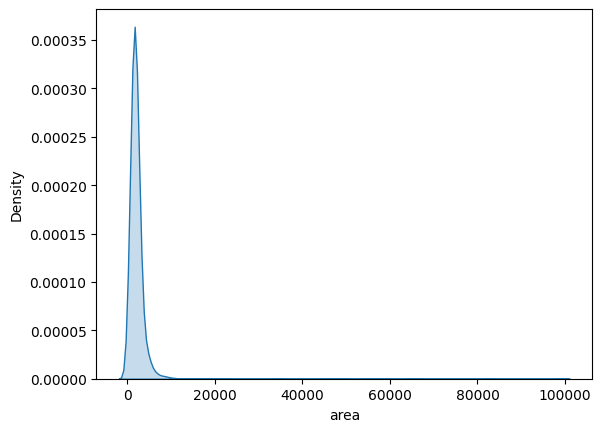

In [512]:
sns.kdeplot(df['area'], fill=True)
plt.show()

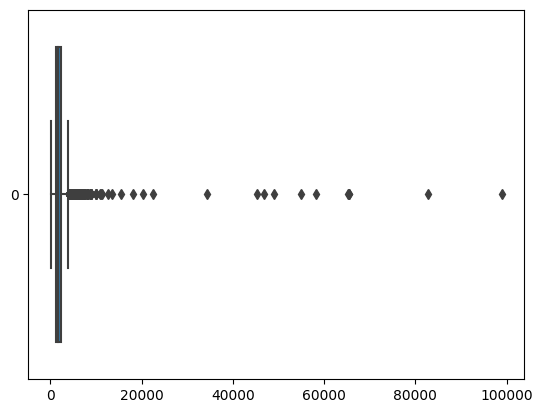

In [513]:
sns.boxplot(df['area'], orient='h')
plt.show()

In [514]:
df[df['area'] > 10000].sort_values('area',ascending=False)

# 818, 1796, 1123, 2, 2356, 115, 3649, 2503, 1471

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
818,house,independent,sector 26,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6.0,8.0,3+,...,NaN,NaN,11000.00,0.0,1.0,1.0,1.0,0.0,1.0,60.0
48,house,ganpati heights apartment,sector 13,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10.0,6.0,2,...,NaN,115.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,7.0
1796,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2.0,2.0,2,...,NaN,NaN,64529.00,1.0,0.0,0.0,0.0,0.0,0.0,15.0
1123,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64412 (5984.07 sq.m.),3.0,2.0,1,...,NaN,NaN,64412.00,0.0,0.0,0.0,0.0,0.0,0.0,51.0
300,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10.0,10.0,3+,...,NaN,NaN,7250.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2.0,2.0,1,...,NaN,NaN,58141.00,0.0,0.0,0.0,0.0,0.0,0.0,15.0
2356,flat,rof ananda,sector 95,0.33,60.0,55000.0,Carpet area: 54917 (5101.96 sq.m.),2.0,2.0,1,...,NaN,NaN,54917.00,0.0,0.0,0.0,0.0,0.0,0.0,37.0
115,flat,signature the serenas,sohna road,0.28,57.0,49123.0,Carpet area: 48811 (4534.69 sq.m.),1.0,1.0,2,...,NaN,NaN,48811.00,1.0,0.0,0.0,0.0,0.0,0.0,37.0
2666,house,independent,sector 25,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9.0,9.0,2,...,NaN,5800.0,5200.00,0.0,1.0,1.0,0.0,0.0,1.0,109.0
3649,flat,ramsons kshitij,sector 95,0.24,53.0,45283.0,Carpet area: 45966 (4270.38 sq.m.),2.0,2.0,1,...,NaN,NaN,45966.00,0.0,0.0,0.0,0.0,1.0,0.0,33.0


In [515]:
df.drop(index=[818, 1796, 1123, 2, 2356, 115, 3649, 2503, 1471], inplace=True)

In [516]:
print(df[df['area']>10000].shape)
df[df['area']>10000].sort_values('area', ascending=False)

(11, 23)


,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
48,house,ganpati heights apartment,sector 13,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10.0,6.0,2,...,NaN,115.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,7.0
300,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10.0,10.0,3+,...,NaN,NaN,7250.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2666,house,independent,sector 25,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9.0,9.0,2,...,NaN,5800.0,5200.00,0.0,1.0,1.0,0.0,0.0,1.0,109.0
1358,house,independent,sector 57,6.25,2778.0,22498.0,Plot area 3100(2591.99 sq.m.)Built Up area: 26...,9.0,9.0,3+,...,NaN,2660.0,2500.00,0.0,1.0,0.0,0.0,0.0,1.0,61.0
3195,house,independent,sector 43,5.50,2716.0,20250.0,Plot area 215(179.77 sq.m.)Built Up area: 2850...,8.0,7.0,3+,...,NaN,2850.0,2250.00,1.0,1.0,0.0,1.0,1.0,1.0,123.0
2131,flat,godrej air,sector 85,2.50,1379.0,18129.0,Carpet area: 18122 (1683.59 sq.m.),4.0,5.0,3+,...,NaN,NaN,18122.00,1.0,0.0,0.0,1.0,1.0,1.0,44.0
3088,house,unitech aspen greens,sector 50,6.95,4490.0,15479.0,Plot area 240(200.67 sq.m.)Built Up area: 2160...,3.0,3.0,1,...,NaN,2160.0,1720.00,0.0,1.0,0.0,0.0,0.0,0.0,160.0
3444,flat,godrej icon,sector 88a,1.75,1384.0,12645.0,Carpet area: 1175.11,3.0,3.0,3+,...,NaN,NaN,1175.11,0.0,0.0,0.0,0.0,0.0,0.0,55.0
2834,house,independent,sector 43,27.50,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6.0,7.0,3+,...,NaN,11286.0,NaN,1.0,1.0,0.0,1.0,1.0,1.0,42.0
2342,flat,m3m golfestate,sector 65,13.20,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4.0,4.0,3,...,NaN,NaN,11000.00,0.0,1.0,0.0,0.0,0.0,0.0,60.0


In [517]:
df.loc[48,'area'] = 115*9
df.loc[300,'area'] = 7250
df.loc[2666,'area'] = 5800
df.loc[1358,'area'] = 2660
df.loc[3195,'area'] = 2850
df.loc[2131,'area'] = 1812
df.loc[3088,'area'] = 2160
df.loc[3444,'area'] = 1175

In [518]:
df['area'].shape

(3633,)

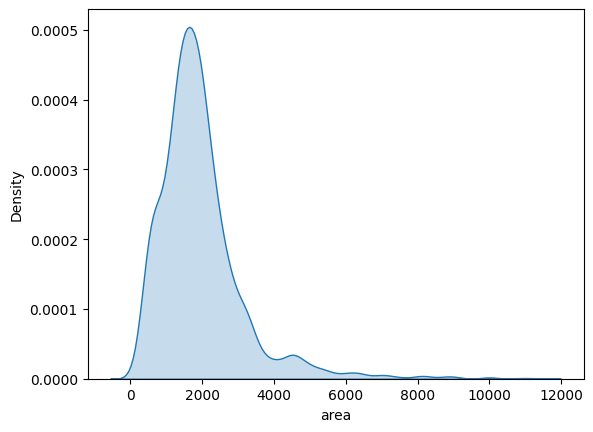

In [519]:
sns.kdeplot(df['area'], fill=True)
plt.show()

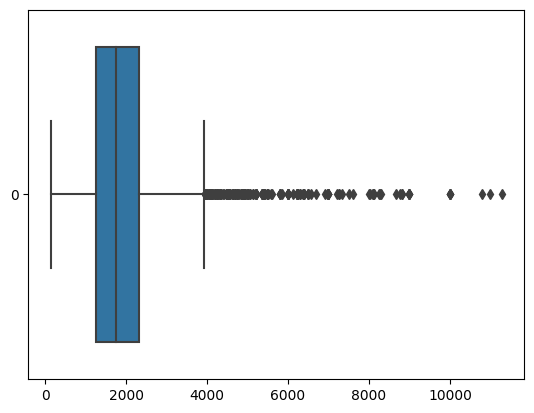

In [520]:
sns.boxplot(df['area'], orient='h')
plt.show()

In [521]:
df['area'].describe()

count     3633.000000
mean      1950.357005
std       1215.707897
min        145.000000
25%       1260.000000
50%       1747.000000
75%       2325.000000
max      11286.000000
Name: area, dtype: float64

bedRoom Analysis

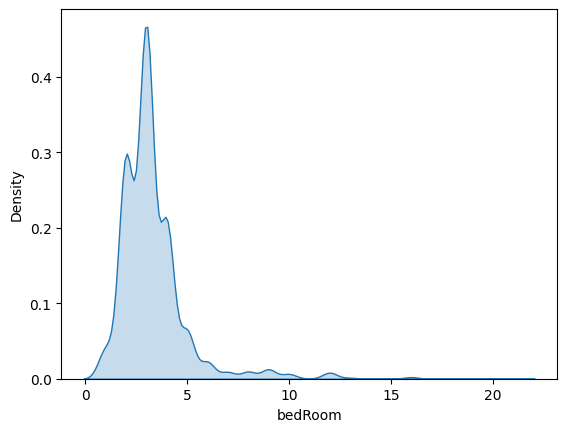

In [522]:
sns.kdeplot(df['bedRoom'], fill=True)
plt.show()

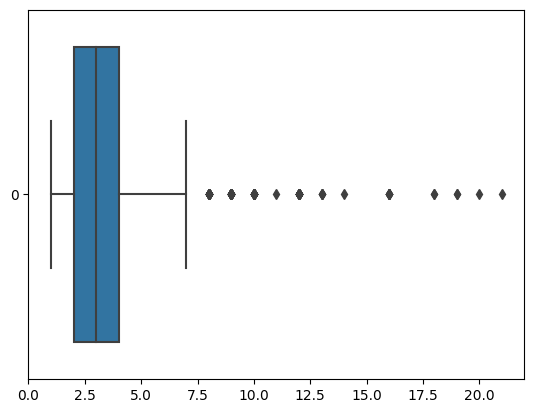

In [523]:
sns.boxplot(df['bedRoom'], orient='h')
plt.show()

In [524]:
df['bedRoom'].describe()

count    3633.000000
mean        3.333609
std         1.830035
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        21.000000
Name: bedRoom, dtype: float64

In [525]:
print(df[df['bedRoom'] > 10].shape)
df[df['bedRoom'] > 10].sort_values('bedRoom', ascending=False)

(45, 23)


,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3618,house,independent,sector 54,5.00,43066.0,1161.0,Plot area 129(107.86 sq.m.),21.0,21.0,3+,...,NaN,1161.0,NaN,0.0,1.0,0.0,0.0,0.0,2.0,49.0
2611,house,independent,sector 43,4.50,39062.0,1152.0,Plot area 128(107.02 sq.m.),20.0,20.0,3+,...,NaN,1152.0,NaN,0.0,1.0,0.0,0.0,0.0,2.0,22.0
78,house,independent,sector 17a,3.87,5160.0,7500.0,Plot area 1623(150.78 sq.m.)Built Up area: 750...,19.0,17.0,3+,...,NaN,7500.0,NaN,1.0,0.0,1.0,0.0,0.0,0.0,68.0
1493,house,independent,sector 17a,3.93,24214.0,1623.0,Plot area 1623(150.78 sq.m.)Built Up area: 162...,19.0,17.0,3,...,NaN,1622.0,NaN,1.0,1.0,1.0,1.0,0.0,0.0,74.0
19,house,independent,sector 54,5.50,38194.0,1440.0,Plot area 160(133.78 sq.m.),18.0,18.0,3+,...,NaN,1440.0,NaN,0.0,1.0,0.0,0.0,0.0,2.0,70.0
1381,house,private house,sector 55,7.05,46906.0,1503.0,Plot area 167(139.63 sq.m.),18.0,18.0,3+,...,NaN,1503.0,NaN,0.0,0.0,0.0,0.0,1.0,2.0,57.0
3457,house,independent,sector 56,12.39,45889.0,2700.0,Plot area 300(250.84 sq.m.),16.0,18.0,3+,...,NaN,2700.0,NaN,0.0,1.0,0.0,1.0,0.0,1.0,49.0
2137,house,independent,sector 40,12.00,38986.0,3078.0,Plot area 342(285.96 sq.m.),16.0,16.0,3+,...,NaN,3078.0,NaN,1.0,1.0,1.0,1.0,0.0,1.0,0.0
2096,house,luxury dlf city floors,sector 26,20.00,48888.0,4091.0,Plot area 500(418.06 sq.m.),16.0,16.0,3+,...,NaN,500.0,NaN,0.0,1.0,0.0,0.0,0.0,1.0,31.0
2039,house,independent,sector 43,13.50,50000.0,2700.0,Plot area 300(250.84 sq.m.),16.0,16.0,3+,...,NaN,2700.0,NaN,1.0,1.0,0.0,1.0,1.0,0.0,41.0


In [526]:
df = df[df['bedRoom'] <= 10]
df.shape

(3588, 23)

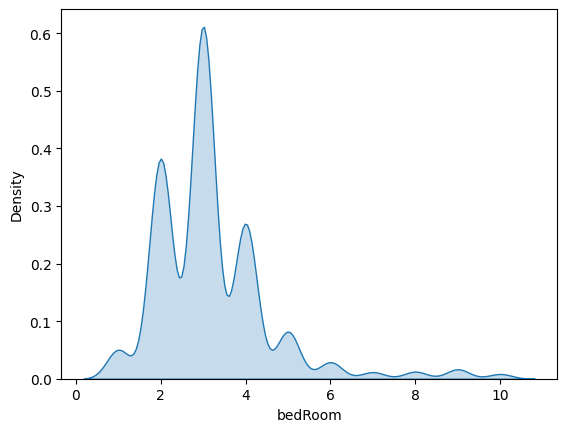

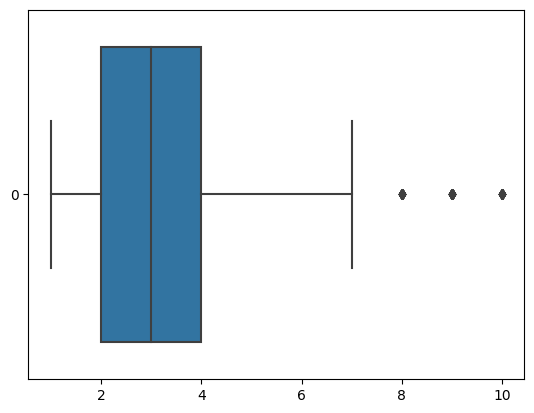

In [527]:
sns.kdeplot(df['bedRoom'], fill=True)
plt.show()
sns.boxplot(df['bedRoom'], orient='h')
plt.show()

In [528]:
df['bedRoom'].describe()

count    3588.000000
mean        3.203735
std         1.393968
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: bedRoom, dtype: float64

bathRoom

In [529]:
df['bathroom'].describe()


count    3588.000000
mean        3.272854
std         1.455585
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        12.000000
Name: bathroom, dtype: float64

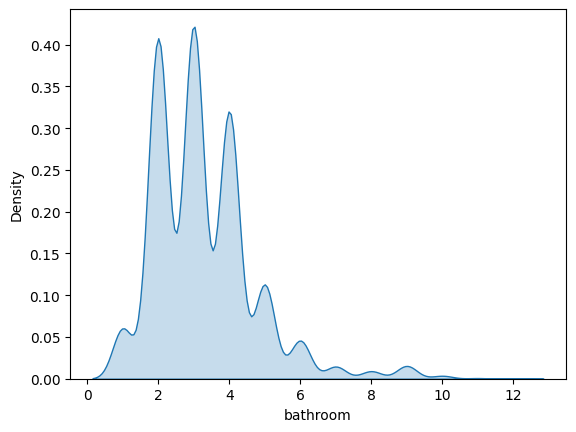

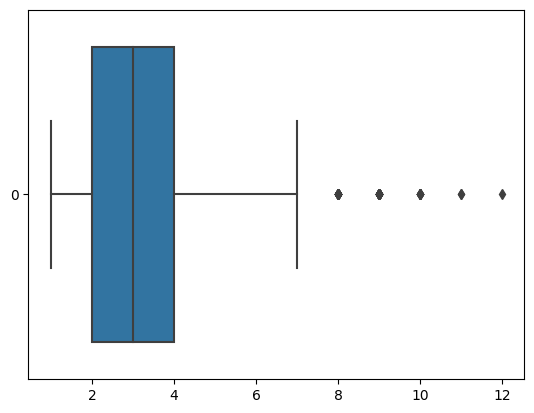

In [530]:
sns.kdeplot(df['bathroom'], fill=True)
plt.show()
sns.boxplot(df['bathroom'], orient='h')
plt.show()

In [531]:
df[df['bathroom'] > 10]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2771,house,independent,sector 39,7.00,10000.0,7000.0,Plot area 350(32.52 sq.m.)Built Up area: 7000 ...,10.0,11.0,3+,...,NaN,7000.0,NaN,0.0,0.0,0.0,1.0,0.0,2.0,38.0
2816,house,independent,sector 24,11.00,28902.0,3806.0,Plot area 3806.45(353.63 sq.m.)Built Up area: ...,8.0,11.0,3+,...,NaN,5000.0,NaN,1.0,1.0,0.0,1.0,1.0,1.0,39.0
3267,house,adani brahma samsara,sector 60,18.02,28200.0,6390.0,Built Up area: 6390 (593.65 sq.m.),9.0,12.0,3+,...,NaN,6390.0,NaN,0.0,1.0,0.0,0.0,0.0,1.0,146.0


count     1875.000000
mean      1925.237627
std        764.172177
min         89.000000
25%       1479.500000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64


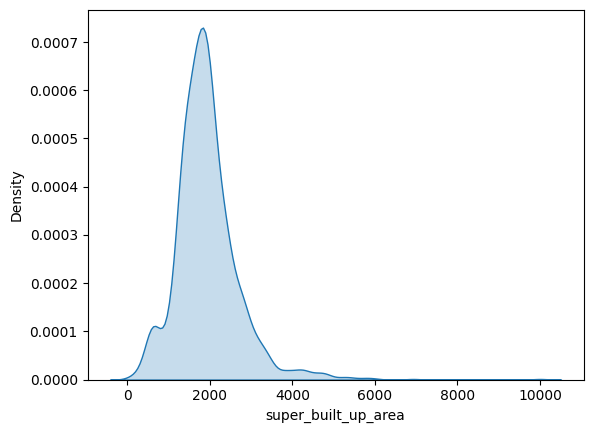

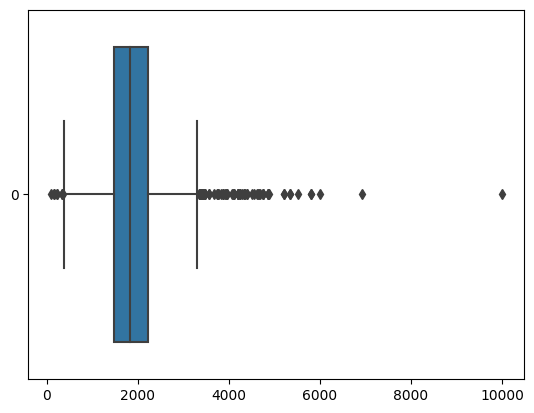

In [532]:
# 'super_built_up_area', 'built_up_area', 'carpet_area'
print(df['super_built_up_area'].describe())
sns.kdeplot(df['super_built_up_area'], fill=True)
plt.show()
sns.boxplot(df['super_built_up_area'], orient='h')
plt.show()

In [533]:
df[df['super_built_up_area'] > 6000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1323,flat,bestech park view grand spa,sector 81,4.7,6786.0,6926.0,Super Built up area 6926(643.45 sq.m.),4.0,4.0,3+,...,6926.0,NaN,NaN,0.0,1.0,0.0,0.0,0.0,1.0,140.0
3265,flat,krrish provence estate,gwal pahari,7.5,7500.0,10000.0,Super Built up area 10000(929.03 sq.m.),5.0,6.0,3+,...,10000.0,NaN,NaN,0.0,1.0,0.0,1.0,1.0,0.0,49.0


count     1613.000000
mean      1938.088673
std       1398.149189
min         14.000000
25%       1120.000000
50%       1650.000000
75%       2385.000000
max      11286.000000
Name: built_up_area, dtype: float64


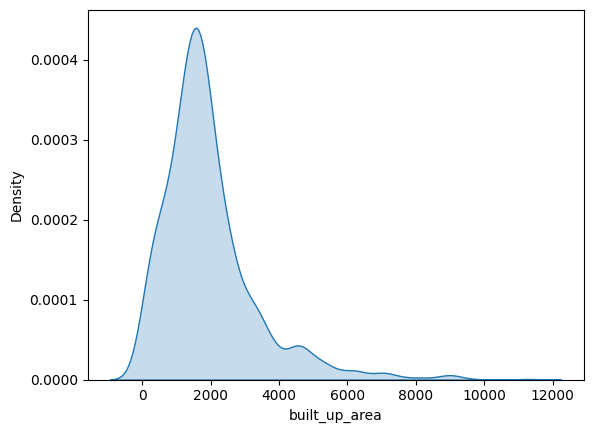

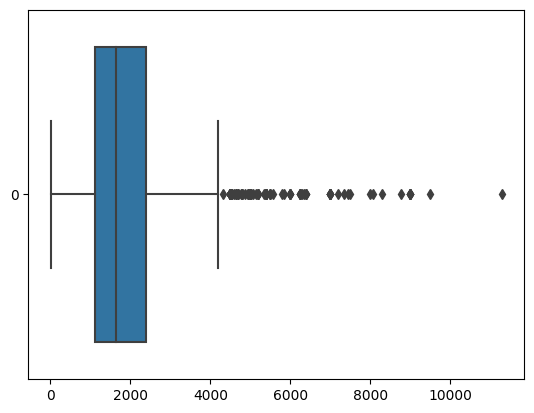

In [534]:
#'built_up_area'
print(df['built_up_area'].describe())
sns.kdeplot(df['built_up_area'], fill=True)
plt.show()
sns.boxplot(df['built_up_area'], orient='h')
plt.show()

In [535]:
df[df['built_up_area'] > 6000].shape
# interestingly here we see 34 records while in case of super_built_up_area were 2

(34, 23)

count     1850.000000
mean      1433.470204
std       1041.839596
min         15.000000
25%        845.000000
50%       1300.000000
75%       1764.797500
max      18122.000000
Name: carpet_area, dtype: float64


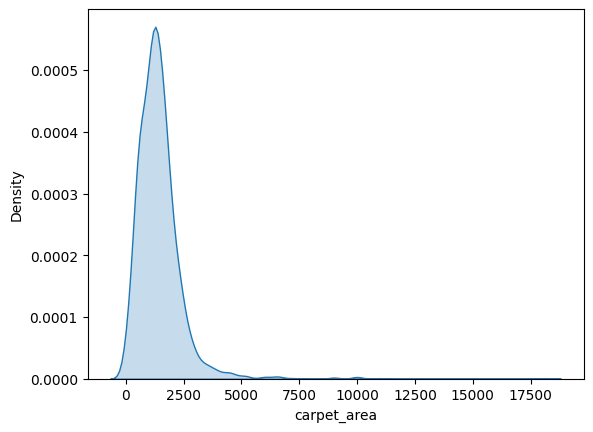

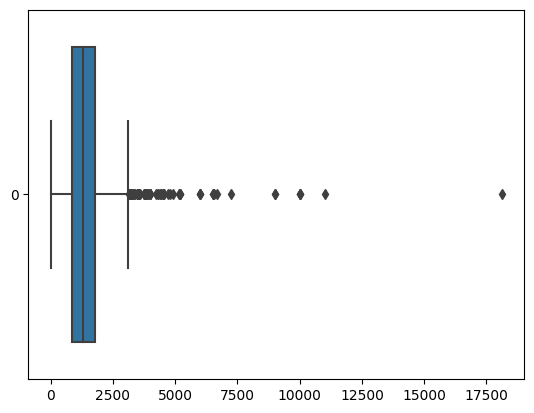

In [536]:
# 'carpet_area'
print(df['carpet_area'].describe())
sns.kdeplot(df['carpet_area'], fill=True)
plt.show()
sns.boxplot(df['carpet_area'], orient='h')
plt.show()

In [538]:
df[df['carpet_area'] > 6000].shape

(12, 23)

In [539]:
df[df['carpet_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2131,flat,godrej air,sector 85,2.5,1379.0,1812.0,Carpet area: 18122 (1683.59 sq.m.),4.0,5.0,3+,...,NaN,NaN,18122.0,1.0,0.0,0.0,1.0,1.0,1.0,44.0
2342,flat,m3m golfestate,sector 65,13.2,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4.0,4.0,3,...,NaN,NaN,11000.0,0.0,1.0,0.0,0.0,0.0,0.0,60.0


In [544]:
df.loc[2131,'carpet_area'] = 1812
df[df['carpet_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2342,flat,m3m golfestate,sector 65,13.2,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4.0,4.0,3,...,NaN,NaN,11000.0,0.0,1.0,0.0,0.0,0.0,0.0,60.0


count    3588.000000
mean       71.825808
std        53.249381
min         0.000000
25%        31.000000
50%        59.000000
75%       110.000000
max       174.000000
Name: luxury_score, dtype: float64


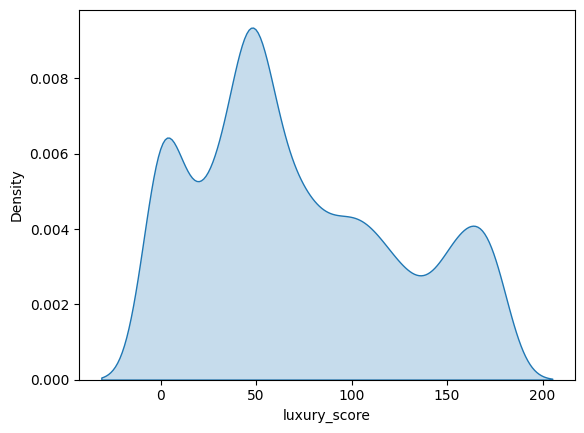

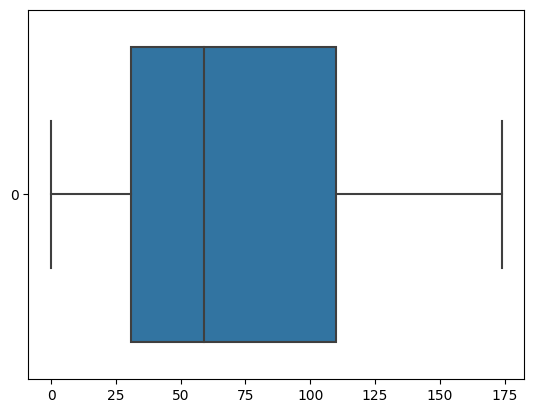

In [545]:
print(df['luxury_score'].describe())
sns.kdeplot(df['luxury_score'], fill=True)
plt.show()
sns.boxplot(df['luxury_score'], orient='h')
plt.show()

In [547]:
df.loc[:, 'price_per_sqft'] = round(df['price']*10000000/df['area'])

count     3588.000000
mean     11285.669175
std       7075.103090
min        544.000000
25%       6756.500000
50%       8912.500000
75%      13296.250000
max      49500.000000
Name: price_per_sqft, dtype: float64


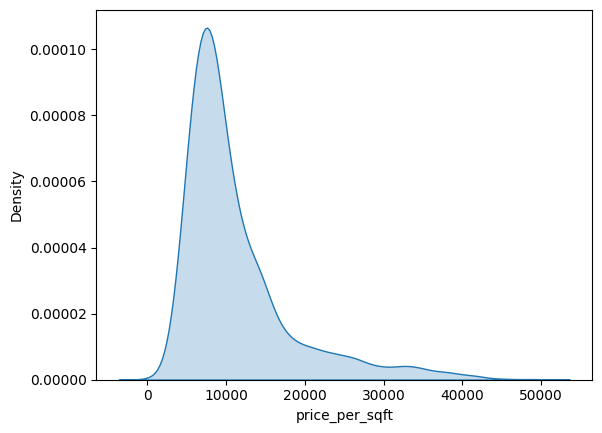

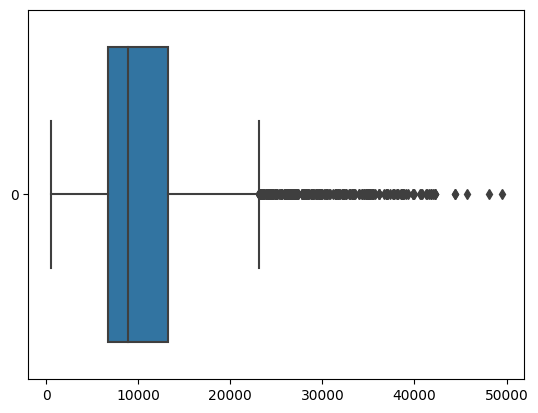

In [550]:
print(df['price_per_sqft'].describe())
sns.kdeplot(df['price_per_sqft'], fill=True)
plt.show()
sns.boxplot(df['price_per_sqft'], orient='h')
plt.show()

In [553]:
# for trustworthy data, we took ratio of area to bedroom
# took lower 2 % of it means smallest of area per bedroom
# anything less than this 183.33 can be considered as outlier
x = df[df['price_per_sqft'] <= 20000]
lower_out = (x['area']/x['bedRoom']).quantile(0.02)
lower_out

183.33333333333334

In [556]:
print(df[df['area']/df['bedRoom'] < lower_out].shape)
df[df['area']/df['bedRoom'] < lower_out]

(77, 23)


,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
37,house,independent,sector 104,0.45,12162.0,370.0,Plot area 370(34.37 sq.m.)Carpet area: 1500 sq...,4.0,4.0,2,...,NaN,NaN,1500.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0
48,house,ganpati heights apartment,sector 13,1.25,12077.0,1035.0,Plot area 115(7692.86 sq.m.),10.0,6.0,2,...,NaN,115.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,7.0
93,house,independent,sector 105,1.10,12222.0,900.0,Carpet area: 900 (83.61 sq.m.),6.0,4.0,1,...,NaN,NaN,900.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99,house,independent,sector 4,1.10,11111.0,990.0,Built Up area: 990 (91.97 sq.m.),6.0,4.0,1,...,NaN,990.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
186,house,independent,sector 13,1.50,11538.0,1300.0,Plot area 1300(120.77 sq.m.),10.0,7.0,3,...,NaN,1300.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3686,house,independent,sector 12,0.90,13333.0,675.0,Built Up area: 675 (62.71 sq.m.),4.0,4.0,0,...,NaN,675.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3713,house,independent,sector 41,4.25,26235.0,1620.0,Plot area 180(150.5 sq.m.),10.0,9.0,3+,...,NaN,1620.0,NaN,1.0,1.0,0.0,0.0,0.0,1.0,36.0
3751,house,independent,sector 21,0.45,8411.0,535.0,Carpet area: 535 (49.7 sq.m.),3.0,2.0,1,...,NaN,NaN,535.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3774,house,independent,sector 28,0.45,10000.0,450.0,Built Up area: 50 (4.65 sq.m.),5.0,3.0,0,...,NaN,50.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
